### Import Libraries

In [1]:
# Manipulation Libraries
import pandas as pd
import numpy as np
import plotly_express as px
from  plotly.subplots import make_subplots
# Visualization libraries
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.ignore=True

## I. Prepare the Data

> Note: land covered in 1000 ha, fires in ha.

## I.A LAND COVERAGE DATA

* This landcover dataframe conatains 14 columns.
* This dataframe have data about how much land, different type of vegetated non Vegetated areas has cover in each Areas/Country. 
* Value column represent numerical value of hectares of land for differnt type of Vergetated and non vegetated areas.
* unit column represent unit of 'Value' column values, which is 1000 hectares.
* 'Area', and 'Area Code (ISO3)' represent each country/area name and their area code respectively.
* Year column represent Year in which corresponding land coverage data has collected.
* each value of Element columns is 'Area from MODIS', whose full form is "MODIS stands for Moderate Resolution Imaging Spectroradiometer". it is bascially a satelite sensor, which measures visible and infrared radiation from Earth's atmosphere, which eventually used to measure the surface land cover data. 
* since for Analysis Area, Area Code (ISO3), Item, Year, Value columns are enough so rest of the column will be dropped.
* Flag column has three type categorical values and those are 'FC','NV',and 'A'. here 'FC' means calculated data, NV mean data not available, A mean aggregated value.
* all row removed which Flag value is 'NA'.

In [2]:
coverLand=pd.read_csv('land_cover_data_11-30-2021.csv')
coverLand=coverLand.replace('United States of America','United States')
coverLand=coverLand.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')
coverLand.head()

Domain Code      Domain Area Code (ISO3)         Area  Element Code  \
0          LC  Land Cover              AFG  Afghanistan          5007   
1          LC  Land Cover              AFG  Afghanistan          5007   
2          LC  Land Cover              AFG  Afghanistan          5007   
3          LC  Land Cover              AFG  Afghanistan          5007   
4          LC  Land Cover              AFG  Afghanistan          5007   

           Element  Item Code  \
0  Area from MODIS       6970   
1  Area from MODIS       6970   
2  Area from MODIS       6970   
3  Area from MODIS       6970   
4  Area from MODIS       6970   

                                                Item  Year Code  Year  \
0  Artificial surfaces (including urban and assoc...       2001  2001   
1  Artificial surfaces (including urban and assoc...       2002  2002   
2  Artificial surfaces (including urban and assoc...       2003  2003   
3  Artificial surfaces (including urban and assoc...       2004  2004   
4  Artificial surfaces (including urban and assoc...       2005  2005   

      Unit    Value Flag Flag Description  
0  1000 ha  88.1603   FC  Calculated data  
1  1000 ha  88.1818   FC  Calculated data  
2  1000 ha  88.2247   FC  Calculated data  
3  1000 ha  88.2462   FC  Calculated data  
4  1000 ha  88.3106   FC  Calculated data

> * In the Value column out of 43472 row , 43400 row contain not null values and rest of the rows contains not null values.
* so rows with null values will be dropped.

In [3]:
coverLand=coverLand[coverLand['Flag']!='NV']
coverLand=coverLand[['Area','Area Code (ISO3)','Item','Year','Value']]
coverLand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43472 entries, 0 to 60741
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              43472 non-null  object 
 1   Area Code (ISO3)  43472 non-null  object 
 2   Item              43472 non-null  object 
 3   Year              43472 non-null  int64  
 4   Value             43400 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.0+ MB


In [4]:
coverLand.dropna(inplace=True)
coverLand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 0 to 60741
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              43400 non-null  object 
 1   Area Code (ISO3)  43400 non-null  object 
 2   Item              43400 non-null  object 
 3   Year              43400 non-null  int64  
 4   Value             43400 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.0+ MB


> * Distribution of each type of Land Coverage data is uniform.
> * This dataframe contains data about land Coverage of each country and for each year from 2001 to 2018.<br> Distribution of each Year is not uniform.
> * Distribution of each Area/country data is not unifrom since some of the countries has divided or combined in that 18 years.
> * Distribution of each pair of (Area,Year) values is uniform. and numerically it is 10. It also means that for each pair of Area and year there are total 10 different land converge data available.
> * Reason for non uniform distribution of Area column value and Year column values are absence of Yearly data of some countries. One of the Reason is some of the country has divided into more than one countries for example Former Sudan in 2011 is divided into Sudan and South Sudan. for that reason some of yearly data of Sudan and South Sudan is not available from 2001 to 2010, But after 2011 the data are available but not for Former Sudan. 


In [5]:
coverLand=coverLand.groupby(['Area','Area Code (ISO3)','Year','Item']).sum().reset_index()
print('distribution of area\n\n',coverLand['Area'].value_counts(),"\n"+'*'*80)
print('distribution of Item\n\n',coverLand['Item'].value_counts(),"\n"+'*'*80)
print('distribution of Year\n\n',coverLand['Year'].value_counts(),"\n"+'*'*80)
print('distribution of Each pain of Area and Year\n\n',coverLand[['Area','Year','Value']].groupby(['Area','Year']).count().sort_values('Value',ascending=True),"\n"+'*'*80)

distribution of area

 Afghanistan                      180
Oman                             180
Netherlands                      180
Netherlands Antilles (former)    180
New Caledonia                    180
                                ... 
Montenegro                       130
Sudan (former)                   100
South Sudan                       80
Sudan                             80
Serbia and Montenegro             50
Name: Area, Length: 244, dtype: int64 
********************************************************************************
distribution of Item

 Artificial surfaces (including urban and associated areas)           4340
Grassland                                                            4340
Herbaceous crops                                                     4340
Inland water bodies                                                  4340
Mangroves                                                            4340
Permanent snow and glaciers                              

In [6]:
coverLandPivot=pd.pivot_table(coverLand,index=['Area','Area Code (ISO3)','Year'],columns=['Item'],values=['Value'])
coverLandPivot.columns=coverLandPivot.Value.columns
coverLandPivot.groupby(by=coverLandPivot.index).sum()
coverLandPivot.head()

Item                               Artificial surfaces (including urban and associated areas)  \
Area        Area Code (ISO3) Year                                                               
Afghanistan AFG              2001                                            88.1603            
                             2002                                            88.1818            
                             2003                                            88.2247            
                             2004                                            88.2462            
                             2005                                            88.3106            

Item                                Grassland  Herbaceous crops  \
Area        Area Code (ISO3) Year                                 
Afghanistan AFG              2001  23533.7602         1938.1961   
                             2002  23597.6426         2105.9089   
                             2003  23822.6478         2128.1690   
                             2004  24072.0168         2012.8114   
                             2005  24356.4181         1972.0907   

Item                               Inland water bodies  Mangroves  \
Area        Area Code (ISO3) Year                                   
Afghanistan AFG              2001              30.0737        0.0   
                             2002              23.5695        0.0   
                             2003              13.7811        0.0   
                             2004               3.4131        0.0   
                             2005               9.1659        0.0   

Item                               Permanent snow and glaciers  \
Area        Area Code (ISO3) Year                                
Afghanistan AFG              2001                     344.5701   
                             2002                     365.4779   
                             2003                     413.3467   
                             2004                     447.3916   
                             2005                     444.6869   

Item                               Shrub-covered areas  \
Area        Area Code (ISO3) Year                        
Afghanistan AFG              2001            4526.5074   
                             2002            4586.6119   
                             2003            4637.5504   
                             2004            4714.9563   
                             2005            4839.3295   

Item                               Shrubs and/or herbaceous vegetation, aquatic or regularly flooded  \
Area        Area Code (ISO3) Year                                                                      
Afghanistan AFG              2001                                             1.2450                   
                             2002                                             1.8246                   
                             2003                                             1.7602                   
                             2004                                             5.0230                   
                             2005                                             2.2110                   

Item                               Terrestrial barren land  Tree-covered areas  
Area        Area Code (ISO3) Year                                               
Afghanistan AFG              2001               33103.7590            554.8927  
                             2002               32849.1953            562.0837  
                             2003               32556.7658            560.0445  
                             2004               32414.3398            559.8942  
                             2005               32043.9892            562.5345

* After pivoting the dataframe by columns='Item' no of rows reduced by 10%.
* there are data of total 244 countries/Area available. and for each Area data 18 years from 2001 to 2018 available so there should be total 244*18=4392 no of rows but since there are some area/countries whose data are not avilable for some timeline due to non existence of those countries in that timeline. it also means that each country should have 18 years of data in this pivot table
* So coutries with less than 18 no of data are 'Serbia and Montenegro', 'Sudan', 'South Sudan', 'Sudan (former)', 'Montenegro', 'Serbia', and 'Singapore'.

In [7]:
countriesWithLessData=coverLandPivot.reset_index()[['Area','Area Code (ISO3)','Year']].groupby(['Area','Area Code (ISO3)']).count().sort_values('Year')
countriesWithLessData=countriesWithLessData[countriesWithLessData.Year!=18]
countriesWithLessData

Item                                    Year
Area                  Area Code (ISO3)      
Serbia and Montenegro SCG                  5
Sudan                 SDN                  8
South Sudan           SSD                  8
Sudan (former)        206                 10
Montenegro            MNE                 13
Serbia                SRB                 13
Singapore             SGP                 17

In [8]:
coverLandPivot.describe()

Item   Artificial surfaces (including urban and associated areas)  \
count                                        4340.000000            
mean                                          352.220900            
std                                          1461.427999            
min                                             0.000000            
25%                                             0.450800            
50%                                            30.825000            
75%                                           154.055200            
max                                         13892.559100            

Item       Grassland  Herbaceous crops  Inland water bodies    Mangroves  \
count    4340.000000       4340.000000          4340.000000  4340.000000   
mean    13623.712160       5647.677287          2052.819531    84.885927   
std     43500.830423      21516.853265          7575.655359   359.713556   
min         0.000000          0.000000             0.000000     0.000000   
25%         6.514875          0.042900            35.289900     0.000000   
50%       462.928600        234.392250           158.922550     0.000000   
75%      4159.489375       2329.818325          1006.775975     7.851150   
max    288630.112200     196808.100200         78127.728800  3851.685000   

Item   Permanent snow and glaciers  Shrub-covered areas  \
count                  4340.000000          4340.000000   
mean                   5052.016706          5647.678826   
std                   64169.998298         36598.318694   
min                       0.000000             0.000000   
25%                       0.000000             0.000000   
50%                       0.000000             0.386400   
75%                       0.000000           125.459375   
max                  982529.432800        449512.799500   

Item   Shrubs and/or herbaceous vegetation, aquatic or regularly flooded  \
count                                        4340.000000                   
mean                                          421.483859                   
std                                          3327.751649                   
min                                             0.000000                   
25%                                             0.214700                   
50%                                             7.244750                   
75%                                            72.098525                   
max                                         43108.720700                   

Item   Terrestrial barren land  Tree-covered areas  
count              4340.000000         4340.000000  
mean               9280.599254        21710.872655  
std               32545.548288        84880.226109  
min                   0.000000            0.000000  
25%                   0.042900            3.293975  
50%                   1.363050          930.760000  
75%                 185.148475        10429.789475  
max              228118.523400       917064.779800

* by analyzing the distribution of year column and each type of land coverage value it is found that.
* the year distribution is approximately uniform excepting few contries, where some of the year data is not available for that country.
* by analyzing the each type of land coverage data it is obserbed that distribution of all of them is right skewed.
* only median of tree covered areas is 930.76 thousand hectares of land. 
* except tree covered areas, most of the landcoverage area are mangroves, permanent snows and glaciers, shrub covered areas, Terrestrial barren land, has median land coverage area are around 1000 hectares of land.
*  hrubs and/or herbaceous vegetation, aquatic or regularly flooded has median of around 7000 hectares of land.
*  Artificial surfaces (including urban and associated areas) has around 30,000 hectares of land.
* grassland  has median 462,000 hectares.
* Herbaceous crops has median 234,000 hectares.
* Island Water bodies has median value 158,000 hactares of land.

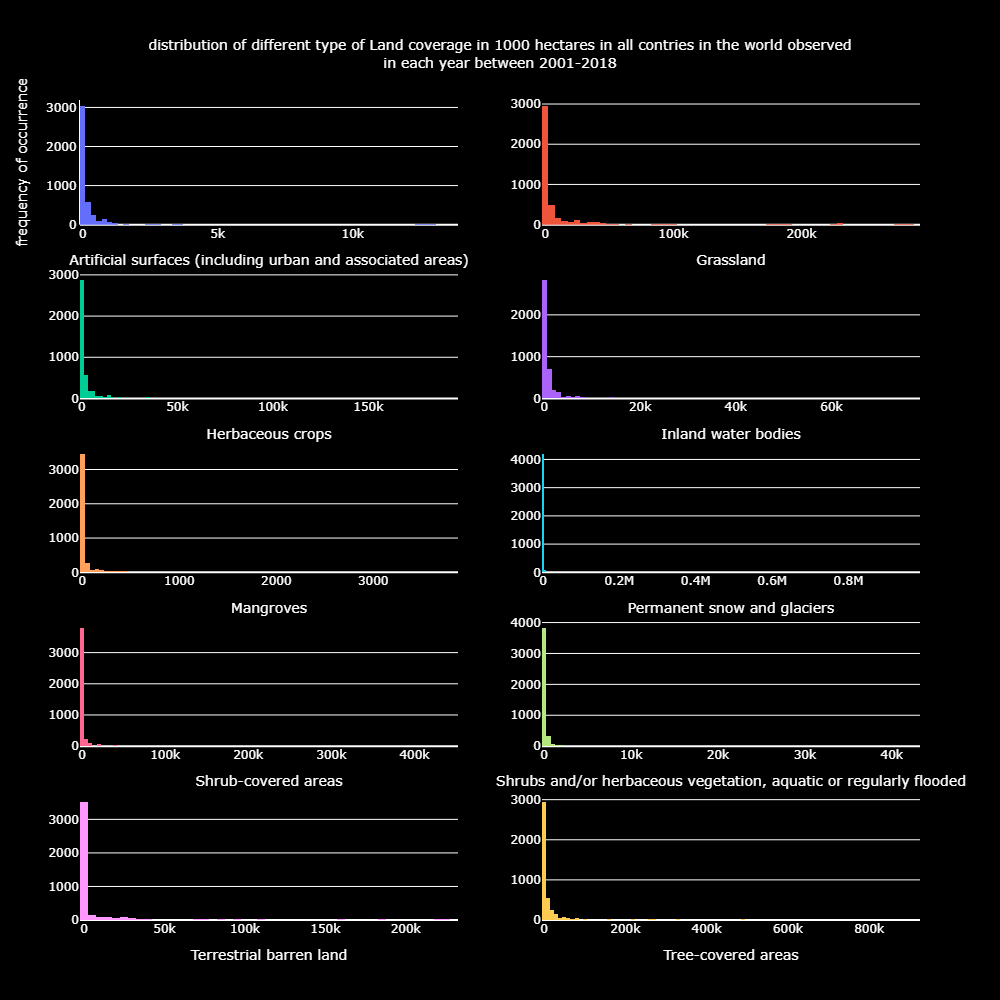

In [9]:
fig=make_subplots(rows=5, cols=2 )
for i,colname in enumerate(coverLandPivot.columns):
    fig.append_trace(go.Histogram(x=coverLandPivot[colname],
                                  hovertemplate='%{x}:'),
                                 i//2+1,i%2+1
                                )
    # fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=i//2+1, col=i%2+1,)
    fig.update_xaxes(title_text=f'{colname}',title=dict(font=dict(size=14,color='white')),row=i//2+1,col=i%2+1)
# fig.append_trace(go.Histogram(x=landCoveragePivot['Year'],
#                               hovertemplate='%{x}:'),
#                              6,1
#                             )
# fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=6, col=1,)
# fig.update_xaxes(title_text=f'Year',title=dict(font=dict(size=14,color='white')),row=6,col=1)
fig.update_layout(
    font = {"color" : 'white'},
    height=1000,
    width=1000,
    title_text='distribution of different type of Land coverage in 1000 hectares in all contries in the world observed<br>in each year between 2001-2018 ',
    yaxis=dict(title='frequency of occurrence',showline=True),   
    title=dict(x=0.5,xanchor='center',font=dict(color='white',size=14)),
    paper_bgcolor='black',
    plot_bgcolor='black',
    showlegend=False
)
fig.show('png')

* from below pie chart it is obserbed that
> * most of land Areas in the world are Tree Covered Areas, Grass land, Terrestrial Barren Land, and Shrub covered Areas.
> * 

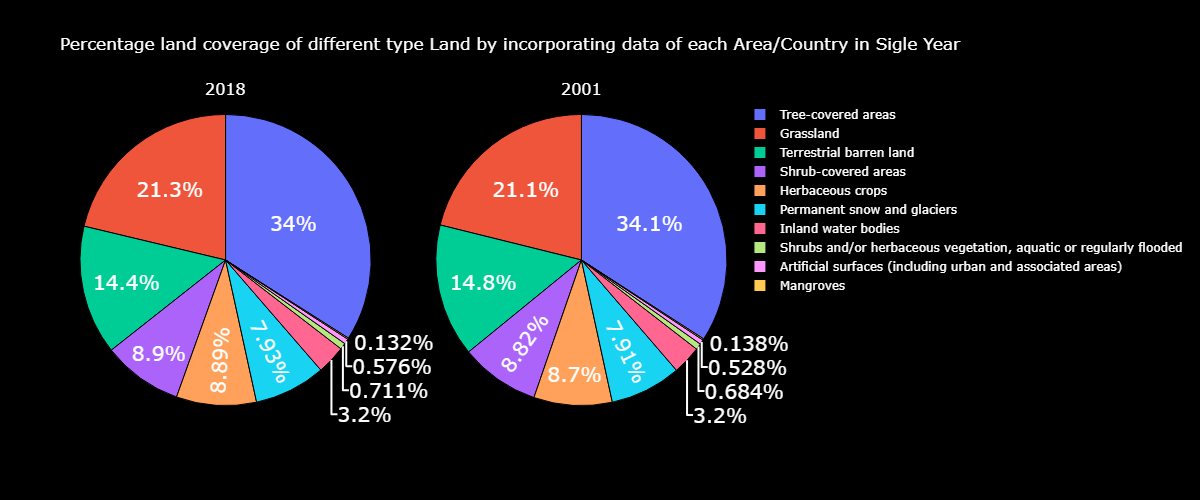

In [10]:
fig=make_subplots(1,2,subplot_titles=['2018','2001'],specs=[[{'type':'pie'},{'type':'pie'}]])
coverLand2018=coverLandPivot.reset_index()
coverLand2018=coverLand2018[coverLand2018.Year==2018]
coverLand2018=pd.DataFrame(coverLand2018.iloc[:,3:].sum(axis=0)).sort_values(0,ascending=False)
fig.add_trace(go.Pie(labels=coverLand2018.index, values=coverLand2018[0],scalegroup='one'),1,1)
coverLand2001=coverLandPivot.reset_index()
coverLand2001=coverLand2001[coverLand2001.Year==2001]
coverLand2001=pd.DataFrame(coverLand2001.iloc[:,3:].sum(axis=0)).sort_values(0,ascending=False)
fig.add_trace(go.Pie(labels=coverLand2001.index, values=coverLand2001[0]),1,2)

fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,textfont_color='white',
                  marker=dict( line=dict(color='black', width=1)))
fig.update_layout(height=500,width=1200,font = {"color" : 'white'},plot_bgcolor='black',paper_bgcolor='black',title=dict(text='Percentage land coverage of different type Land by incorporating data of each Area/Country in Sigle Year',font=dict(color='white')))

fig.show('png')

## I.B ANALYSIS OF FIRE DATA

1. fires data has 17 no of columns.
2. out of them Area, Area code, Year, year code, are very intuistic.
3. item column has 7 types of category which are 'Closed shrubland','Grassland', 'Humid Tropical Forest','Open shrubland','Other Forest', and 'Savana' and these are distributed uniformly.
4. Unit column representing the data are stored in hectares units.
5. Flag column representing how data is collected: "Calculated Data" and "Aggregate, may include official, semi-official, estimated or calculated data"
6. Each value of Element column are 'Burned Area'. It mean dataframe contains data of burned Area only.
7. In this analysis only Area, Area Code, Item, Year, Value are going to be analyzed.


In [11]:
landfiredf=pd.read_csv('fires_data_11-29-2021.csv')
landfiredf=landfiredf.replace('United States of America','United States')
landfiredf=landfiredf.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')
landfiredf.head()

Domain Code Domain Area Code (ISO3)         Area  Element Code      Element  \
0          GI  Fires              AFG  Afghanistan          7246  Burned Area   
1          GI  Fires              AFG  Afghanistan          7246  Burned Area   
2          GI  Fires              AFG  Afghanistan          7246  Burned Area   
3          GI  Fires              AFG  Afghanistan          7246  Burned Area   
4          GI  Fires              AFG  Afghanistan          7246  Burned Area   

   Item Code                   Item  Year Code  Year  Source Code      Source  \
0       6796  Humid tropical forest       1990  1990         3050  FAO TIER 1   
1       6796  Humid tropical forest       1991  1991         3050  FAO TIER 1   
2       6796  Humid tropical forest       1992  1992         3050  FAO TIER 1   
3       6796  Humid tropical forest       1993  1993         3050  FAO TIER 1   
4       6796  Humid tropical forest       1994  1994         3050  FAO TIER 1   

  Unit  Value Flag Flag Description  Note  
0   ha    0.0   Fc  Calculated data   NaN  
1   ha    0.0   Fc  Calculated data   NaN  
2   ha    0.0   Fc  Calculated data   NaN  
3   ha    0.0   Fc  Calculated data   NaN  
4   ha    0.0   Fc  Calculated data   NaN

* from the distribution each column of the dataset it is clear that 
> * This dataframe contains data from 1990 to 2019.
> * value column is overally  right skewed.


In [12]:
landfiredf[['Year','Value']].describe()

Year         Value
count  47649.000000  4.764900e+04
mean    2004.636404  4.120817e+05
std        8.609612  2.744637e+06
min     1990.000000  0.000000e+00
25%     1997.000000  0.000000e+00
50%     2005.000000  0.000000e+00
75%     2012.000000  5.514973e+03
max     2019.000000  1.052085e+08

* Distribution of Item column values is uniform 
* Distribution of each Pair of (Area,Year) are also unifrom. numerically it is 7 it means for each unique pair of (Area, year) 7 different type of burned Area value are exist.
* There are two different type of categorical value in Flag column and those are . Both of them will be considered.
* Data frame does not contains null values except Note column.
* Distribution of Year column is not uniform.
* Distribution of Area column is not uniform.
> * since Distribution of (Area,Year) is uniform which is 7 for all the unique pair of (Area, Year) and data from 1990 to 2019 has collected So for each country there should be 210(30Year x 7 different burned area data) number of data exist.
> * But some of the countries are there whose number of occurence is less than 210. One of the reason must be the absence of years of data, since some of the country are there which were not exist for long period of time but after some time theri existence came into the picture becuase division of some of the coutries like USSR, and FORMER SUDAN etc.

In [13]:
print('item column distribution\n\n',landfiredf[['Item']].value_counts())
print('*'*90)
print('item column distribution for each Year and Area\n\n',landfiredf[['Area','Year','Item']].groupby(['Area','Year']).count())
print('*'*90)
print('Flag column distribution\n\n',landfiredf[['Flag']].value_counts())
print('*'*90)
print('checking of null values\n\n',landfiredf.info())
print('*'*90)
print('Distribution of Area column\n\n',landfiredf['Area'].value_counts())
print('*'*90)
print('Distribution of Year column\n\n',landfiredf['Year'].value_counts())


item column distribution

 Item                 
Closed shrubland         6807
Grassland                6807
Humid tropical forest    6807
Open shrubland           6807
Other forest             6807
Savanna                  6807
Woody savanna            6807
dtype: int64
******************************************************************************************
item column distribution for each Year and Area

                   Item
Area        Year      
Afghanistan 1990     7
            1991     7
            1992     7
            1993     7
            1994     7
...                ...
Zimbabwe    2015     7
            2016     7
            2017     7
            2018     7
            2019     7

[6807 rows x 1 columns]
******************************************************************************************
Flag column distribution

 Flag
Fc      47177
A         472
dtype: int64
******************************************************************************************
<class '

In [14]:
landfiredf=landfiredf[['Area','Area Code (ISO3)','Item','Year','Value']]
landfiredf.head()

Area Area Code (ISO3)                   Item  Year  Value
0  Afghanistan              AFG  Humid tropical forest  1990    0.0
1  Afghanistan              AFG  Humid tropical forest  1991    0.0
2  Afghanistan              AFG  Humid tropical forest  1992    0.0
3  Afghanistan              AFG  Humid tropical forest  1993    0.0
4  Afghanistan              AFG  Humid tropical forest  1994    0.0

In [15]:
landfiredfPivot=pd.pivot_table(landfiredf,index=['Area','Area Code (ISO3)','Year'],columns=['Item'],values=['Value'])
landfiredfPivot.columns=landfiredfPivot.Value.columns
landfiredfPivot.head()

Item                               Closed shrubland   Grassland  \
Area        Area Code (ISO3) Year                                 
Afghanistan AFG              1990          557.9448  27973.4536   
                             1991          557.9448  27973.4536   
                             1992          557.9448  27973.4536   
                             1993          557.9448  27973.4536   
                             1994          557.9448  27973.4536   

Item                               Humid tropical forest  Open shrubland  \
Area        Area Code (ISO3) Year                                          
Afghanistan AFG              1990                    0.0       6983.8551   
                             1991                    0.0       6983.8551   
                             1992                    0.0       6983.8551   
                             1993                    0.0       6983.8551   
                             1994                    0.0       6983.8551   

Item                               Other forest   Savanna  Woody savanna  
Area        Area Code (ISO3) Year                                         
Afghanistan AFG              1990       28.6531  211.0227        157.916  
                             1991       28.6531  211.0227        157.916  
                             1992       28.6531  211.0227        157.916  
                             1993       28.6531  211.0227        157.916  
                             1994       28.6531  211.0227        157.916

Distribution of each type of forest fire data dipicted in histogram.


In [16]:
landfiredfPivot.describe()

Item   Closed shrubland     Grassland  Humid tropical forest  Open shrubland  \
count      6.807000e+03  6.807000e+03           6.807000e+03    6.807000e+03   
mean       1.454022e+04  9.991928e+05           1.663995e+05    2.005901e+05   
std        1.220393e+05  4.114082e+06           8.775785e+05    3.042755e+06   
min        0.000000e+00  0.000000e+00           0.000000e+00    0.000000e+00   
25%        0.000000e+00  0.000000e+00           0.000000e+00    0.000000e+00   
50%        0.000000e+00  1.154113e+03           0.000000e+00    0.000000e+00   
75%        8.556640e+01  7.347520e+04           1.738074e+03    2.277925e+02   
max        3.052883e+06  7.639979e+07           1.057238e+07    1.052085e+08   

Item   Other forest       Savanna  Woody savanna  
count  6.807000e+03  6.807000e+03   6.807000e+03  
mean   6.579953e+04  1.150510e+06   2.875393e+05  
std    3.743402e+05  4.728356e+06   1.408044e+06  
min    0.000000e+00  0.000000e+00   0.000000e+00  
25%    0.000000e+00  0.000000e+00   0.000000e+00  
50%    2.850000e+00  2.939824e+02   1.266568e+02  
75%    2.588632e+03  4.421414e+04   1.684790e+04  
max    6.978584e+06  4.600093e+07   1.994236e+07

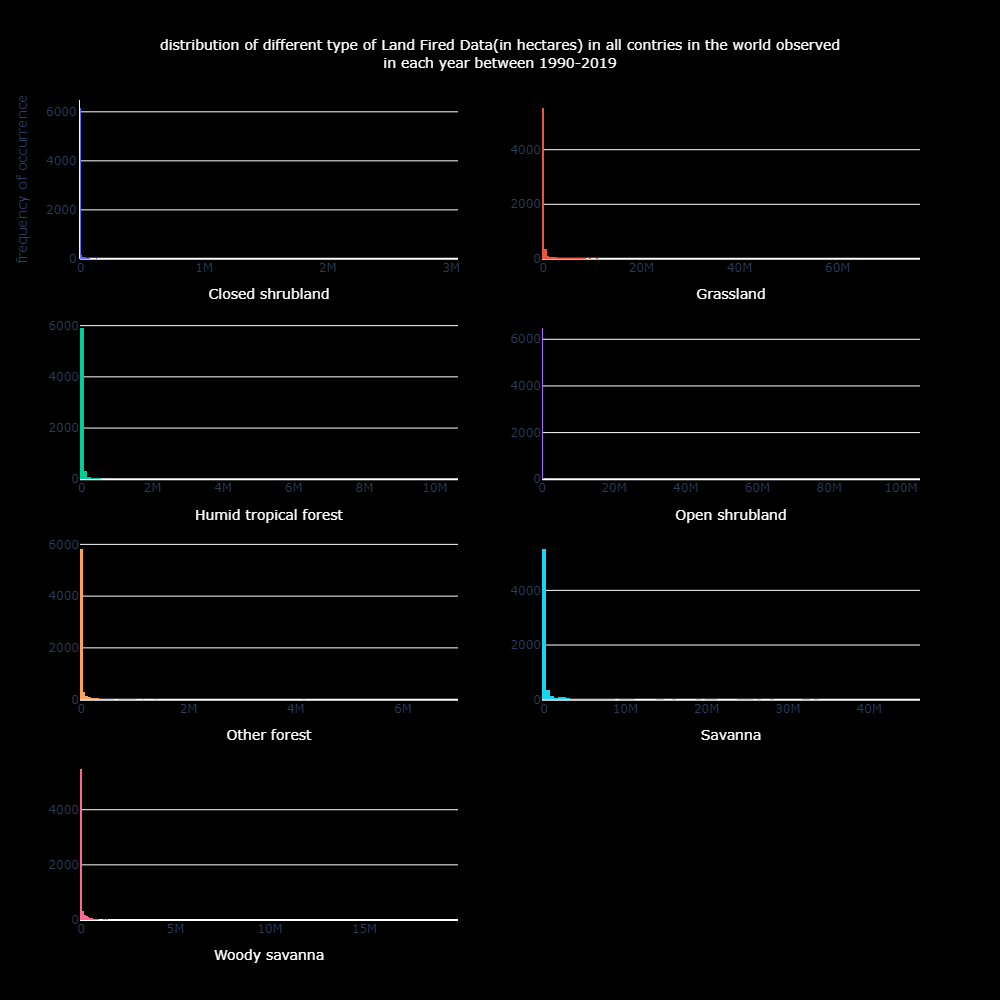

In [17]:
fig=make_subplots(rows=4, cols=2,
                 # subplot_titles=[f"{colname}<br>Land Coverage in 1000 hectares" for colname in landCoveragePivot.columns[3:]]
                 )
for i,colname in enumerate(landfiredfPivot.columns):
    fig.append_trace(go.Histogram(x=landfiredfPivot[colname],
                                  hovertemplate='%{x}:'),
                                 i//2+1,i%2+1
                                )
    # fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=i//2+1, col=i%2+1,)
    fig.update_xaxes(title_text=f'{colname}',title=dict(font=dict(size=14,color='white')),row=i//2+1,col=i%2+1)

# fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=6, col=1,)
# fig.update_xaxes(title_text=f'Year',title=dict(font=dict(size=14,color='white')),row=6,col=1)
fig.update_layout(
    height=1000,
    width=1000,
    title_text='distribution of different type of Land Fired Data(in hectares) in all contries in the world observed<br>in each year between 1990-2019',
    yaxis=dict(title='frequency of occurrence',showline=True),   
    title=dict(x=0.5,xanchor='center',font=dict(color='white',size=14)),
    paper_bgcolor='black',
    plot_bgcolor='black',
    showlegend=False
)
fig.show('png')

* from the below pie chart it is observed that.
> * most of the part of of all burned areas in the world are Savanna and Grassland.
> * Percentage of Savanna and Grassland burned Area has increased by 7% and decreased by 6.3% respectively through out the years from 2001 to 2019

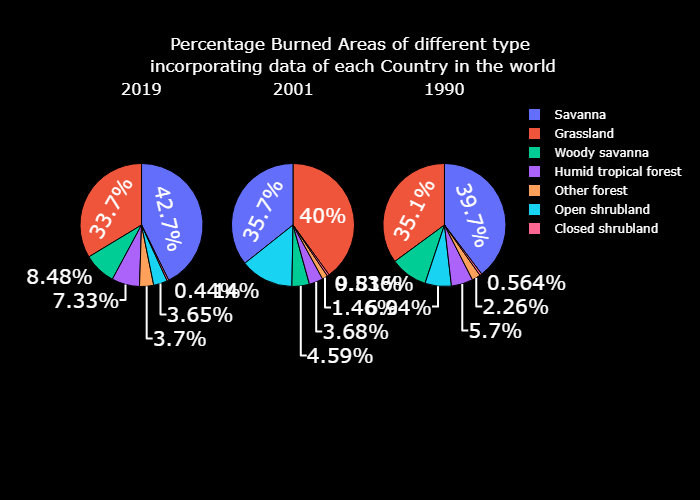

In [18]:
fig=make_subplots(rows=1,cols=3,subplot_titles=['2019', '2001','1990'], specs=[[{"type": "pie"},{"type": "pie"}, {"type": "pie"}]])
landfiredfPivot2019=landfiredfPivot.reset_index()
landfiredfPivot2019=landfiredfPivot2019[landfiredfPivot2019.Year==2019]
landfiredfPivot2019=pd.DataFrame(landfiredfPivot2019.iloc[:,3:].sum(axis=0)).sort_values(0,ascending=False)
fig.add_trace(go.Pie(labels=landfiredfPivot2019.index, values=landfiredfPivot2019[0],scalegroup='one'),1,1)
landfiredfPivot2001=landfiredfPivot.reset_index()
landfiredfPivot2001=landfiredfPivot2001[landfiredfPivot2001.Year==2001]
landfiredfPivot2001=pd.DataFrame(landfiredfPivot2001.iloc[:,3:].sum(axis=0)).sort_values(0,ascending=False)
fig.add_trace(go.Pie(labels=landfiredfPivot2001.index, values=landfiredfPivot2001[0]),1,2)
landfiredfPivot1990=landfiredfPivot.reset_index()
landfiredfPivot1990=landfiredfPivot1990[landfiredfPivot1990.Year==1990]
landfiredfPivot1990=pd.DataFrame(landfiredfPivot1990.iloc[:,3:].sum(axis=0)).sort_values(0,ascending=False)
fig.add_trace(go.Pie(labels=landfiredfPivot1990.index, values=landfiredfPivot1990[0]),1,3)
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,textfont_color='white',
                  marker=dict( line=dict(color='black', width=1)))
fig.update_layout(font = {"color" : 'white'},plot_bgcolor='black',paper_bgcolor='black',title=dict(x=0.5,xanchor='center',text='Percentage Burned Areas of different type<br> incorporating data of each Country in the world',font=dict(color='white')))

fig.show('png')

In [19]:
# === Covered Forest Land ===

# Import the data
cover = pd.read_csv("land_cover_data_11-30-2021.csv")

# Filter only tree-covered areas & Group
cover = cover[cover["Item"] == "Tree-covered areas"]
cover = cover.groupby(["Area", "Area Code (ISO3)", "Year"])["Value"].sum().reset_index()

# Select only the base year (2001) and reference year (2018)
# and compute the percent change between them
cover = cover[(cover["Year"] == 2001) | (cover["Year"] == 2018)].reset_index()
cover = cover.pivot(index=["Area", "Area Code (ISO3)"], columns="Year", values="Value").reset_index()
cover["%change"] = ((cover[2018] - cover[2001])/ cover[2001])*100

cover.head()

Year            Area Area Code (ISO3)       2001       2018    %change
0        Afghanistan              AFG   554.8927   617.1694  11.223197
1            Albania              ALB  1397.3035  1562.2214  11.802583
2            Algeria              DZA   561.8261   867.6890  54.440849
3     American Samoa              ASM     0.0000     0.0000        NaN
4            Andorra              AND    41.0213    41.6223   1.465093

In [20]:
# === Savanna and Forest Fires ===
# Import the data
fires = pd.read_csv("fires_data_11-29-2021.csv")

# Group data
fires = fires.groupby(["Area", "Area Code (ISO3)", "Year"])["Value"].sum().reset_index()

# Select only the base year (2001) and reference year (2018)
# and compute the percent change between them
# (same years to facilitate the correct comparison)
fires = fires[(fires["Year"] == 2001) | (fires["Year"] == 2018)].reset_index()
fires = fires.pivot(index=["Area", "Area Code (ISO3)"], columns="Year", values="Value").reset_index()
fires["%change"] = ((fires[2018] - fires[2001])/ fires[2001])*100

# Replace infinite updated data with nan
fires.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
fires.dropna(inplace=True)

fires.head()

Year         Area Area Code (ISO3)          2001          2018    %change
0     Afghanistan              AFG  9.016835e+02  8.160739e+02  -9.494418
1         Albania              ALB  7.950820e+03  6.059400e+03 -23.788995
2         Algeria              DZA  9.625480e+04  2.662371e+03 -97.234039
5          Angola              AGO  6.267062e+07  6.280184e+07   0.209379
8       Argentina              ARG  1.391189e+07  5.974105e+06 -57.057546

## II. Create the Maps

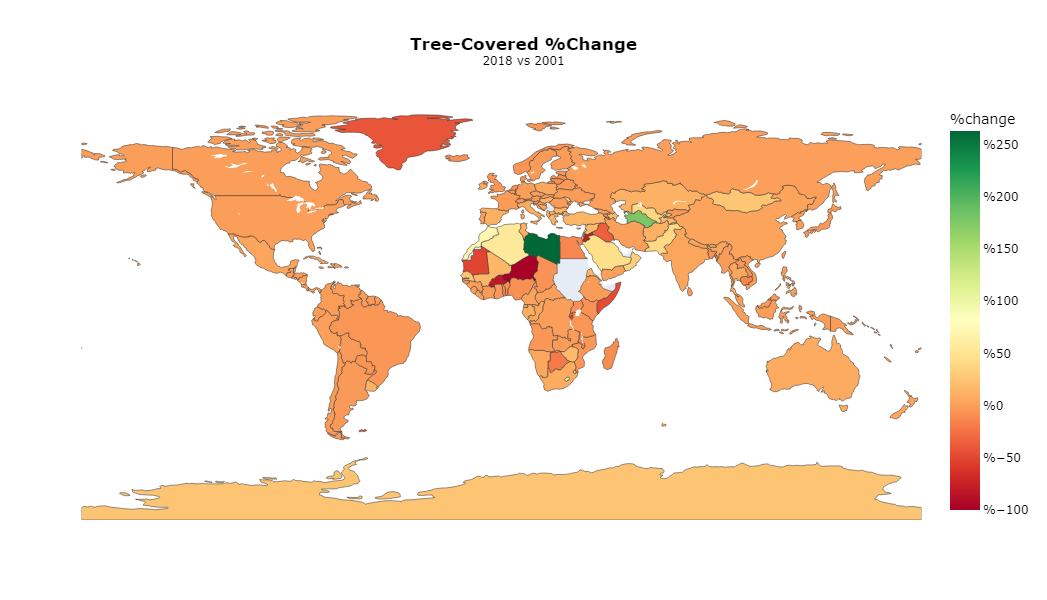

In [21]:
# Create the layout of the chart
title = '<b>Tree-Covered %Change</b><br><sup>2018 vs 2001</sup>'
layout1 = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'},
                   width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'
                           )
                  )

# Create the figure
fig1 = go.Figure(layout = layout1)

# Create the Choropleth map tracing
trace1 = go.Choropleth(
    locations = cover['Area Code (ISO3)'],
    z = cover['%change'],
    text = cover['Area'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='#2E2E2E',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = '%change',
)

fig1.add_trace(trace1)

fig1.show()

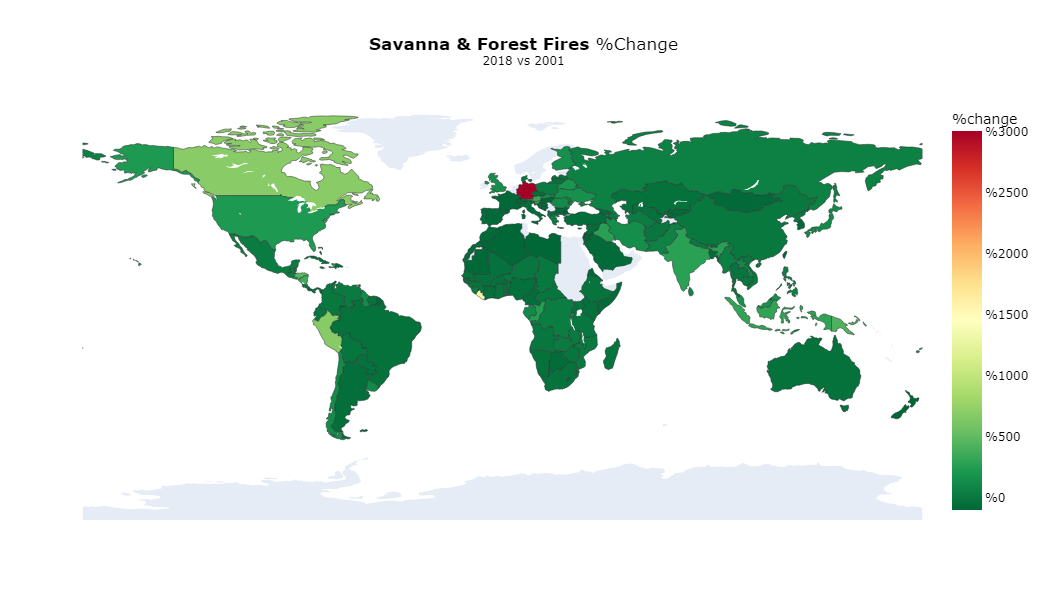

In [22]:
# Create the layout of the chart
title = '<b>Savanna & Forest Fires</b> %Change<br><sup>2018 vs 2001</sup>'
layout2 = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'},
                   width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'
                           )
                  )

# Create the figure
fig2 = go.Figure(layout = layout2)


# Create the Choropleth map tracing
trace2 = go.Choropleth(
    locations = fires['Area Code (ISO3)'],
    z = fires['%change'],
    text = fires['Area'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#2E2E2E',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = '%change',
)

fig2.add_trace(trace2)
fig2.show()

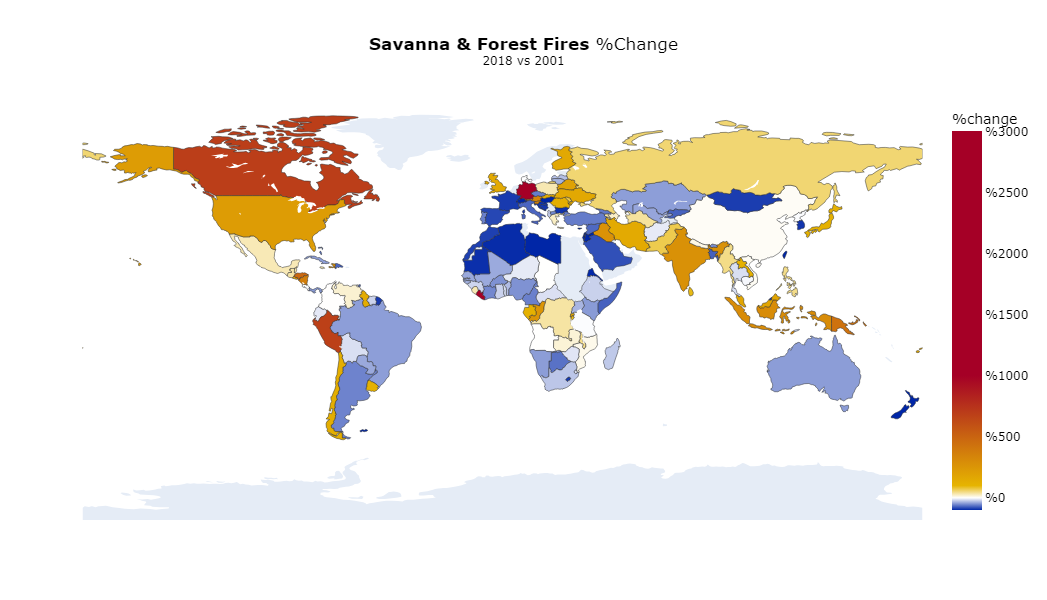

In [23]:
# Create the layout of the chart
title = '<b>Savanna & Forest Fires</b> %Change<br><sup>2018 vs 2001</sup>'
layout2 = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'black'},
                   width=980, height=600, plot_bgcolor="white", paper_bgcolor="white",
                   geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'
                           )
                  )

# Create the figure
fig2 = go.Figure(layout = layout2)

#create new color scale 
#setting values for 0, 100, 1000 % increase
zero = 100/(fires['%change'].max()-fires['%change'].min())
hundred = 200/(fires['%change'].max()-fires['%change'].min())
thousand = 1100/(fires['%change'].max()-fires['%change'].min())

cs =[[0, "rgb(165,0,38)"],[1-thousand, "rgb(165,0,38)"],[1-hundred, "rgb(230,180,0)"], [1-zero, "rgb(255,255,255)"], [1, "rgb(0,38,167)"]]

# Create the Choropleth map tracing
trace2 = go.Choropleth(
    locations = fires['Area Code (ISO3)'],
    z = fires['%change'],
    text = fires['Area'],
    colorscale = cs,
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#2E2E2E',
    marker_line_width=0.5,
    colorbar_tickprefix = '%',
    colorbar_title = '%change',
)

fig2.add_trace(trace2)
fig2.show()

### Further Inquires:

* can you discover evolutions throughout years?
* is the increase in fires correlated to a decrease in covered land?
* what are the areas most affected by fires and why?

## III. can you discover evolutions throughout years?

In [24]:
coverLandPivot['TotalArea']=coverLandPivot.iloc[:,:].sum(axis=1)

In [25]:
coverLandPivot.reset_index(inplace=True)
coverLandPivot.head()

Item         Area Area Code (ISO3)  Year  \
0     Afghanistan              AFG  2001   
1     Afghanistan              AFG  2002   
2     Afghanistan              AFG  2003   
3     Afghanistan              AFG  2004   
4     Afghanistan              AFG  2005   

Item  Artificial surfaces (including urban and associated areas)   Grassland  \
0                                               88.1603           23533.7602   
1                                               88.1818           23597.6426   
2                                               88.2247           23822.6478   
3                                               88.2462           24072.0168   
4                                               88.3106           24356.4181   

Item  Herbaceous crops  Inland water bodies  Mangroves  \
0            1938.1961              30.0737        0.0   
1            2105.9089              23.5695        0.0   
2            2128.1690              13.7811        0.0   
3            2012.8114               3.4131        0.0   
4            1972.0907               9.1659        0.0   

Item  Permanent snow and glaciers  Shrub-covered areas  \
0                        344.5701            4526.5074   
1                        365.4779            4586.6119   
2                        413.3467            4637.5504   
3                        447.3916            4714.9563   
4                        444.6869            4839.3295   

Item  Shrubs and/or herbaceous vegetation, aquatic or regularly flooded  \
0                                                1.2450                   
1                                                1.8246                   
2                                                1.7602                   
3                                                5.0230                   
4                                                2.2110                   

Item  Terrestrial barren land  Tree-covered areas   TotalArea  
0                  33103.7590            554.8927  64121.1645  
1                  32849.1953            562.0837  64180.4962  
2                  32556.7658            560.0445  64222.2902  
3                  32414.3398            559.8942  64318.0924  
4                  32043.9892            562.5345  64318.7364

* IN this plot evolution of two major type of land coverage data in each country through out the years from 2001 to 2018 has visualzed here.
* there is an play and pause button to click , which will start the animation and pause the animation respectively.
> * since Tree covered Land and Grass Land constituent around 50% of whold MODIS land so only these two land converage has been visualized.
> * And total MODIS land coverage also have been visualized. 

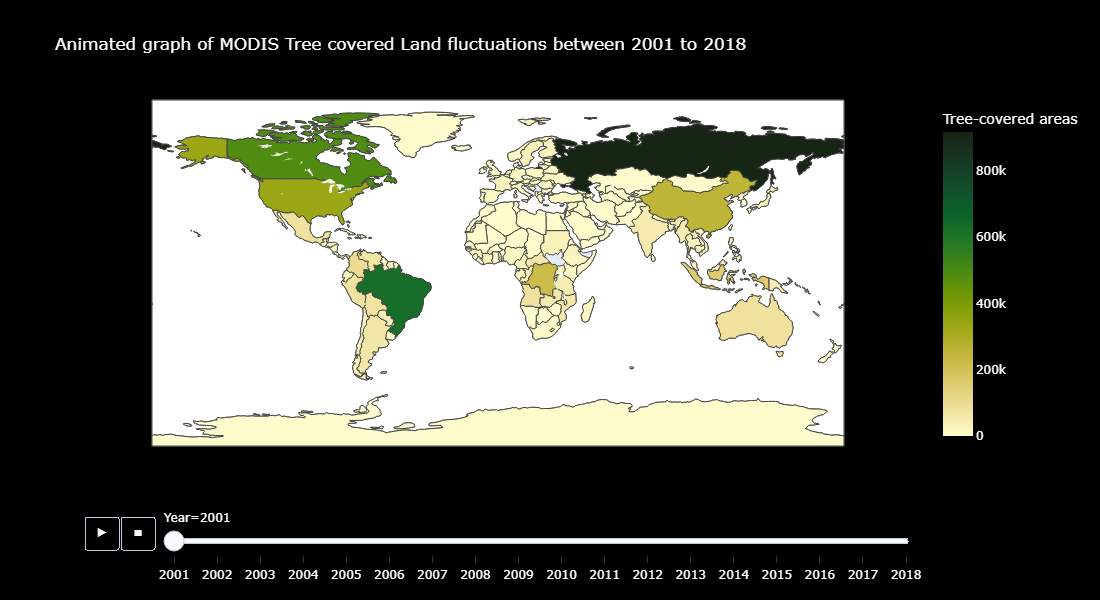

In [26]:
fig = px.choropleth(coverLandPivot , locations = coverLandPivot["Area"], locationmode = "country names", 
                    color="Tree-covered areas", hover_name="Tree-covered areas", animation_frame="Year",
                    range_color=[coverLandPivot['Tree-covered areas'].min(),coverLandPivot['Tree-covered areas'].max()], 
                    title = "Animated graph of MODIS Tree covered Land fluctuations between 2001 to 2018", color_continuous_scale = 'speed',
                    height = 600, width = 1100)
fig.update_layout(plot_bgcolor='black',paper_bgcolor='black',font=dict(color='white'))
fig.show('png')

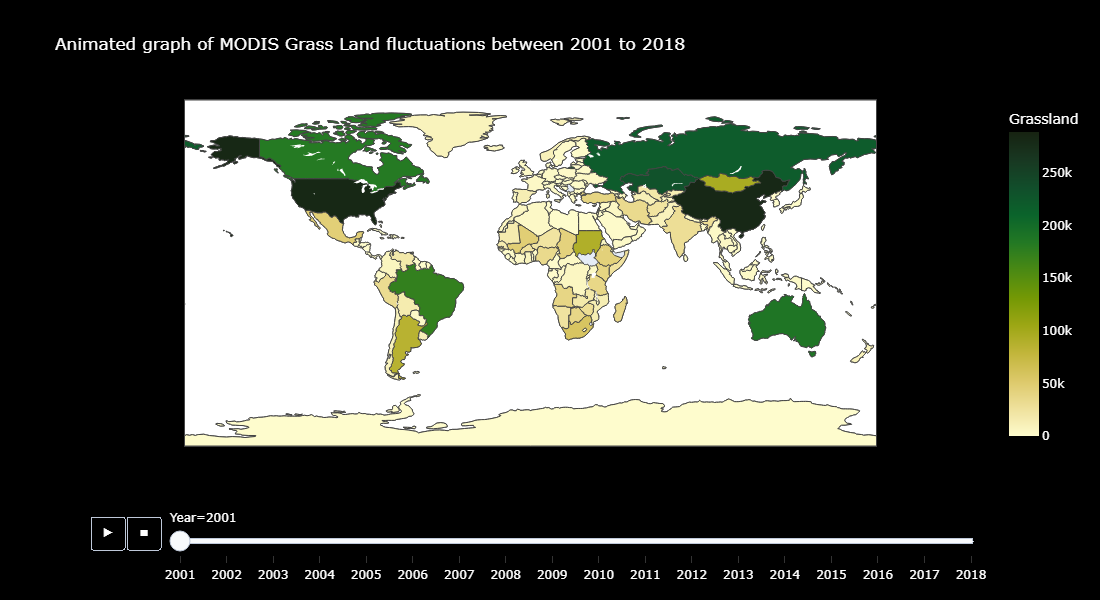

In [27]:
fig = px.choropleth(coverLandPivot , locations = coverLandPivot["Area"], locationmode = "country names", 
                    color="Grassland", hover_name="Grassland", animation_frame="Year",
                    range_color=[coverLandPivot['Grassland'].min(),coverLandPivot['Grassland'].max()], 
                    title = "Animated graph of MODIS Grass Land fluctuations between 2001 to 2018", color_continuous_scale = 'speed',
                    height = 600, width = 1100)
fig.update_layout(plot_bgcolor='black',paper_bgcolor='black',font=dict(color='white'))
fig.show('png')

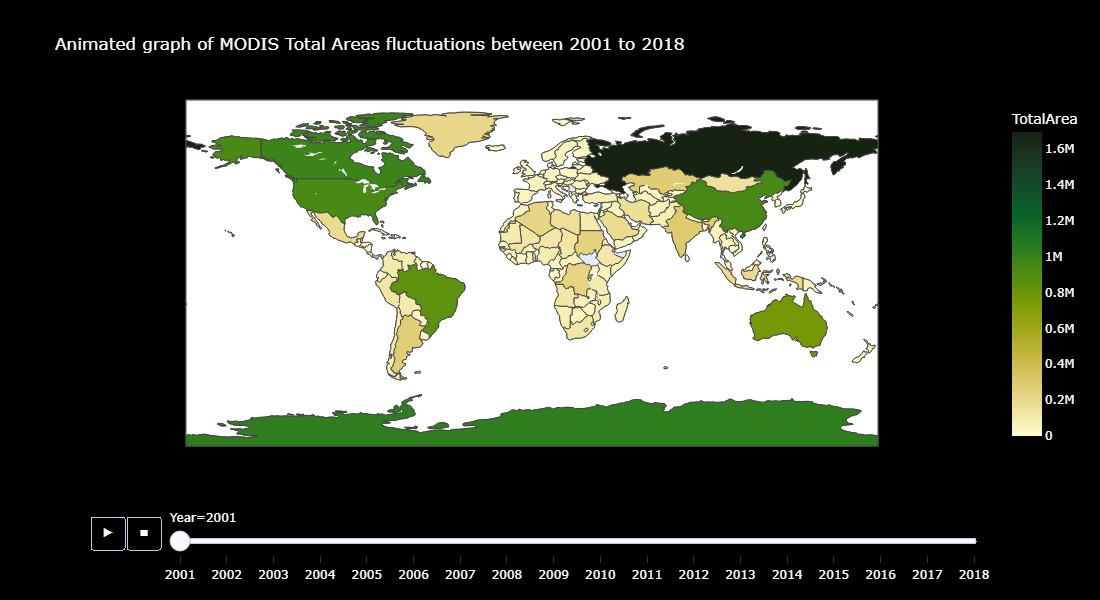

In [28]:
fig = px.choropleth(coverLandPivot , locations = coverLandPivot["Area"], locationmode = "country names", 
                    color="TotalArea", hover_name="TotalArea", animation_frame="Year",
                    range_color=[coverLandPivot['TotalArea'].min(),coverLandPivot['TotalArea'].max()], 
                    title = "Animated graph of MODIS Total Areas fluctuations between 2001 to 2018", color_continuous_scale = 'speed',
                    height = 600, width = 1100)
fig.update_layout(plot_bgcolor='black',paper_bgcolor='black',font=dict(color='white'))
fig.show('png')

In [29]:
landfiredfPivot['TotalBurnedArea']=landfiredfPivot.iloc[:,:].sum(axis=1)
landfiredfPivot.reset_index(inplace=True)
landfiredfPivot.head()

Item         Area Area Code (ISO3)  Year  Closed shrubland   Grassland  \
0     Afghanistan              AFG  1990          557.9448  27973.4536   
1     Afghanistan              AFG  1991          557.9448  27973.4536   
2     Afghanistan              AFG  1992          557.9448  27973.4536   
3     Afghanistan              AFG  1993          557.9448  27973.4536   
4     Afghanistan              AFG  1994          557.9448  27973.4536   

Item  Humid tropical forest  Open shrubland  Other forest   Savanna  \
0                       0.0       6983.8551       28.6531  211.0227   
1                       0.0       6983.8551       28.6531  211.0227   
2                       0.0       6983.8551       28.6531  211.0227   
3                       0.0       6983.8551       28.6531  211.0227   
4                       0.0       6983.8551       28.6531  211.0227   

Item  Woody savanna  TotalBurnedArea  
0           157.916       35912.8453  
1           157.916       35912.8453  
2           157.916       35912.8453  
3           157.916       35912.8453  
4           157.916       35912.8453

IN this animated graph the evolution of Different type of Burned Areas has dipicted graphically for each year from 1990 to 2019.
> * since more than 70% of burned Areas has found in Savanna and GrassLand areas only these two land has been visualized.
> * and total burned Areas in each country also viusalized per year using animation.

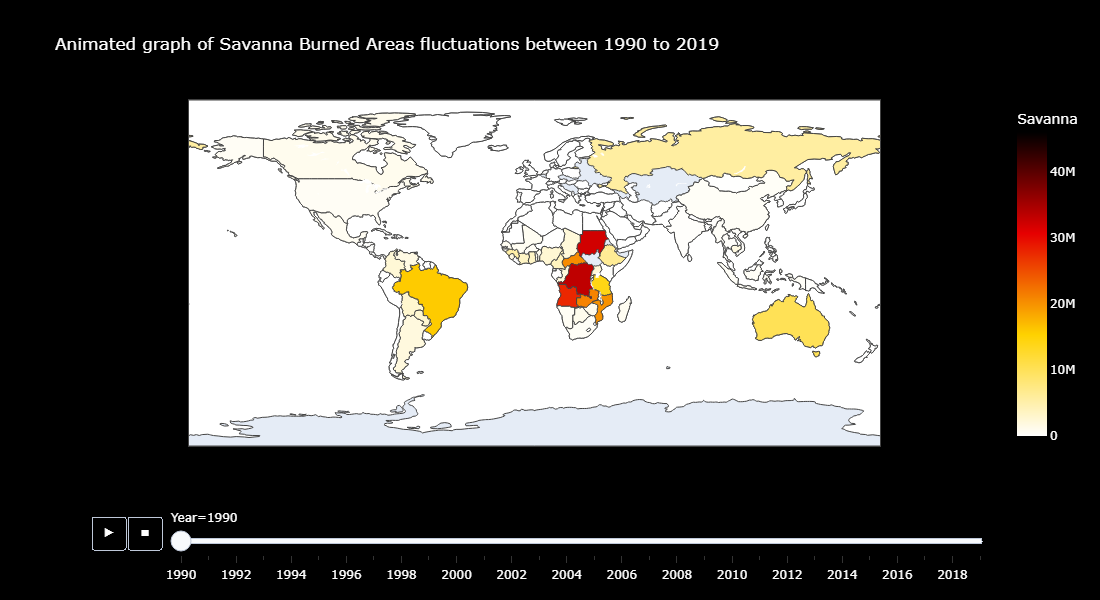

In [30]:
fig = px.choropleth(landfiredfPivot , locations = landfiredfPivot["Area"], locationmode = "country names", 
                    color="Savanna", hover_name="Savanna", animation_frame="Year",
                    range_color=[landfiredfPivot['Savanna'].min(),landfiredfPivot['Savanna'].max()], 
                    title = "Animated graph of Savanna Burned Areas fluctuations between 1990 to 2019", color_continuous_scale = 'hot_r',
                    
                    height = 600, width = 1100)
fig.update_layout(plot_bgcolor='black',paper_bgcolor='black',font=dict(color='white'))
fig.show('png')

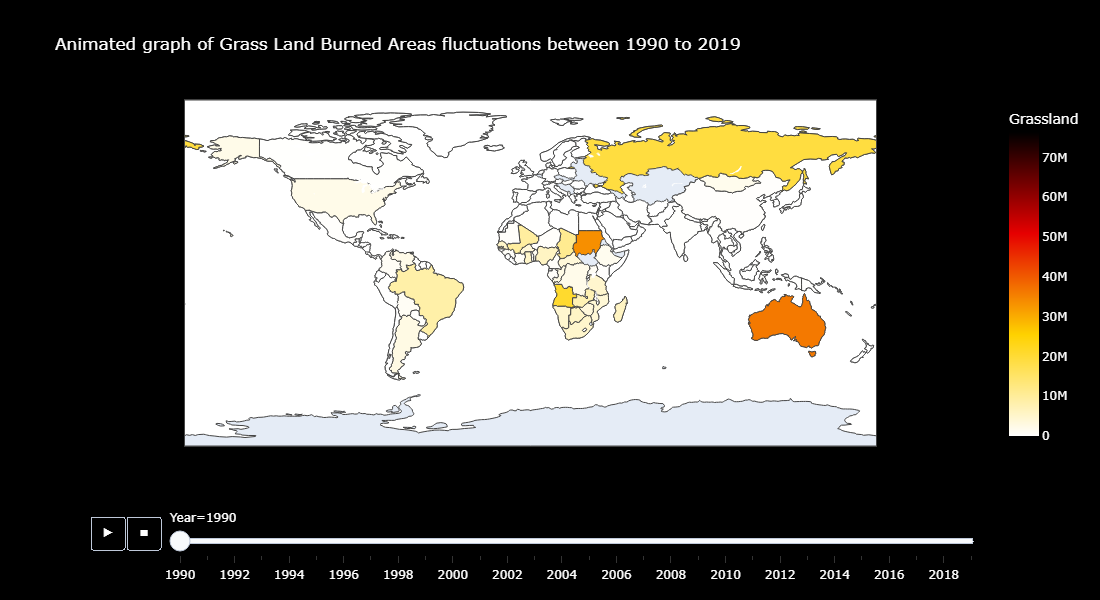

In [31]:
fig = px.choropleth(landfiredfPivot , locations = landfiredfPivot["Area"], locationmode = "country names", 
                    color="Grassland", hover_name="Grassland", animation_frame="Year",
                    range_color=[landfiredfPivot['Grassland'].min(),landfiredfPivot['Grassland'].max()], 
                    title = "Animated graph of Grass Land Burned Areas fluctuations between 1990 to 2019", color_continuous_scale = 'hot_r',
                    
                    height = 600, width = 1100)
fig.update_layout(plot_bgcolor='black',paper_bgcolor='black',font=dict(color='white'))
fig.show('png')

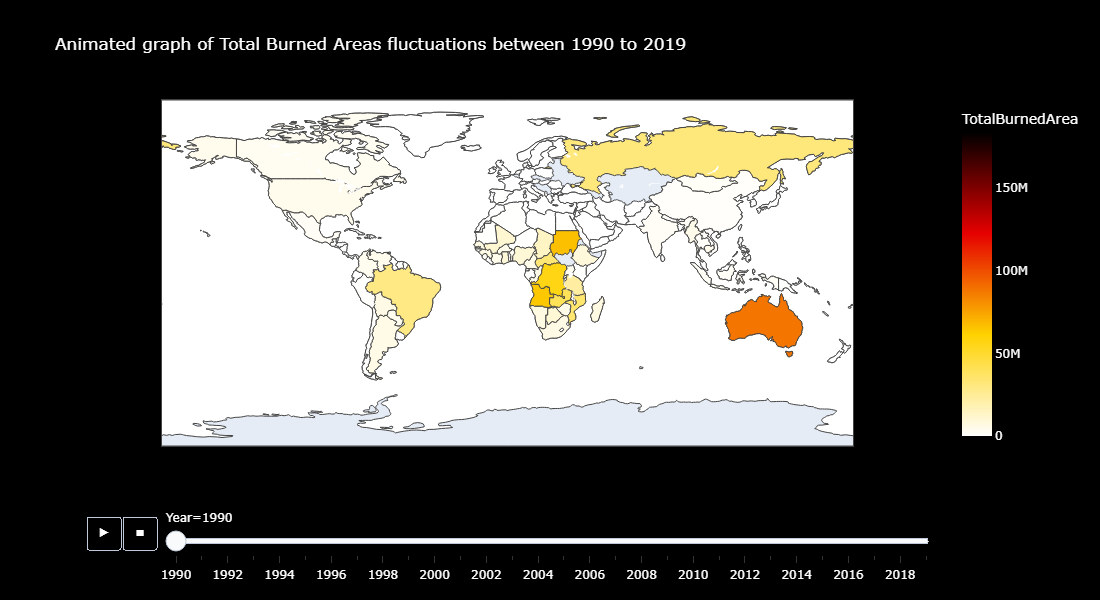

In [32]:
fig = px.choropleth(landfiredfPivot , locations = landfiredfPivot["Area"], locationmode = "country names", 
                    color="TotalBurnedArea", hover_name="TotalBurnedArea", animation_frame="Year",
                    range_color=[landfiredfPivot['TotalBurnedArea'].min(),landfiredfPivot['TotalBurnedArea'].max()], 
                    title = "Animated graph of Total Burned Areas fluctuations between 1990 to 2019", color_continuous_scale = 'hot_r',
                    
                    height = 600, width = 1100)
fig.update_layout(plot_bgcolor='black',paper_bgcolor='black',font=dict(color='white'))
fig.show('png')

## IV. is the increase in fires correlated to a decrease in covered land?

* To Solve this problem the association betweeen landcoverage data and burned area data is calculated, but data of both of the dataset will be considered from 2001 to 2018, since land coverage data available from 2001 to 2018.
* In this data set only total land coverage and total burned areas data is considered for analysis.

In [33]:
corr_Land_and_Burned_Area=pd.merge(landfiredfPivot,coverLandPivot,on=['Area','Area Code (ISO3)','Year'])[['Area','Area Code (ISO3)','Year','TotalBurnedArea','TotalArea']]
corr_Land_and_Burned_Area.head()

Item         Area Area Code (ISO3)  Year  TotalBurnedArea   TotalArea
0     Afghanistan              AFG  2001         901.6835  64121.1645
1     Afghanistan              AFG  2002       36798.6117  64180.4962
2     Afghanistan              AFG  2003      225794.9414  64222.2902
3     Afghanistan              AFG  2004       48437.3535  64318.0924
4     Afghanistan              AFG  2005       21167.9006  64318.7364

In [34]:
Norm_corr_Land_and_Burned_Area=corr_Land_and_Burned_Area.copy()
Norm_corr_Land_and_Burned_Area.iloc[:,-2:]=MinMaxScaler().fit_transform(corr_Land_and_Burned_Area.iloc[:,-2:])
Norm_corr_Land_and_Burned_Area[['TotalBurnedArea','TotalArea']].corr()

Item             TotalBurnedArea  TotalArea
Item                                       
TotalBurnedArea          1.00000    0.34077
TotalArea                0.34077    1.00000

Correlation between Total Burned Areas and Total Area in the world is 0.34, which is very poor to make any statement about the association that lies between them.

In [35]:
corr_Land_and_Burned_Area[['TotalBurnedArea','TotalArea']].corr()

Item             TotalBurnedArea  TotalArea
Item                                       
TotalBurnedArea          1.00000    0.34077
TotalArea                0.34077    1.00000

lets considered only G7 countries.
> * correlation between total burned Areas and Total land coverage of all G7 countries is 0.89 which is very strong statistically.
> * the sign of the  correlation value is also positive,it means the answer of the question 'is the increase in fires correlated to a decrease in covered land?' for G7 countries is No.

In [36]:
G7_countries=['Canada','United Kingdom of Great Britain and Northern Ireland','United States','France','Germany','Italy','Japan']
corr_Land_and_Burned_Area[corr_Land_and_Burned_Area.Area.isin(G7_countries)][['TotalBurnedArea','TotalArea']].corr()

Item             TotalBurnedArea  TotalArea
Item                                       
TotalBurnedArea         1.000000   0.889245
TotalArea               0.889245   1.000000

* lets considered countries where most of time significant land fired has been observed.
* 'Australia','Brazil','Angola', 'Democratic Republic of the Congo', 'Zambia', 'Kazakhstan', 'Sudan (former)', 'Mozambique', 'South Sudan','Sudan'.
> * since correlation between Burned Areas and Total land coverage in above mention coutries is 0.2 which is very poor positive correlation. so we can not say that "increase in fire negatively correlated with increase cover land"

In [37]:
G7_countries=['Zambia','Kazakhstan','Angola','Democratic Republic of the Congo','South Sudan','Sudan','Sudan (former)','Mozambique','Australia','Brazil']
corr_Land_and_Burned_Area[corr_Land_and_Burned_Area.Area.isin(G7_countries)][['TotalBurnedArea','TotalArea']].corr()

Item             TotalBurnedArea  TotalArea
Item                                       
TotalBurnedArea         1.000000   0.191894
TotalArea               0.191894   1.000000

if we consider three major countries or continents which are 'Australia','Brazil', and 'United States' where sigificant land fire has seen then,
> * the correlation between TotalBurnedArea and Total land coverage data is (-0.8) , which is a very strong negative corrleation, found overally in these three countries.
> * So for this three countries we can say that 'Increase in fire correlated to decrease in covered land'

In [38]:
G7_countries=['Australia','Brazil','United States',]
corr_Land_and_Burned_Area[corr_Land_and_Burned_Area.Area.isin(G7_countries)][['TotalBurnedArea','TotalArea']].corr()

Item             TotalBurnedArea  TotalArea
Item                                       
TotalBurnedArea         1.000000  -0.796256
TotalArea              -0.796256   1.000000

By considering Top 10 countries where land fire has affected mostly.
> * selected coutry are 'Australia','Brazil','Angola','Democratic Republic of the Congo','Zambia','Sudan (former)','Mozambique','Central African Republic','United Republic of Tanzania','Russian Federation'
> * correlation between Total Burned Area and total Land Area is found out to be -0.156, for top 10 countires where land fire has affected mostly.
> * correlation is found out to be very poor and negative, it mean overally increase in Land Fire is corrlated with decrease in total Land but they are correlated very poorly.


In [39]:
G7_countries=['Australia','Brazil','Angola','Democratic Republic of the Congo','Zambia','Sudan (former)','Mozambique','Central African Republic','United Republic of Tanzania','Russian Federation']
corr_Land_and_Burned_Area[corr_Land_and_Burned_Area.Area.isin(G7_countries)][['TotalBurnedArea','TotalArea']].corr()

Item             TotalBurnedArea  TotalArea
Item                                       
TotalBurnedArea         1.000000  -0.155995
TotalArea              -0.155995   1.000000

lets see in whole world which country has highest negative correlation between land coverage and fires individually.

In [40]:
negativeCorr=corr_Land_and_Burned_Area.groupby(['Area'])[['TotalBurnedArea','TotalArea']].corr().unstack().iloc[:,1].sort_values(ascending=True)
negativeCorr[:10]

Area
Montenegro         -0.716919
Argentina          -0.600141
Slovenia           -0.555242
Kenya              -0.541709
Papua New Guinea   -0.529158
Niger              -0.498051
Colombia           -0.490392
Réunion            -0.443109
Switzerland        -0.440590
Tunisia            -0.428745
Name: (TotalBurnedArea, TotalArea), dtype: float64

## V. what are the areas most affected by fires and why?

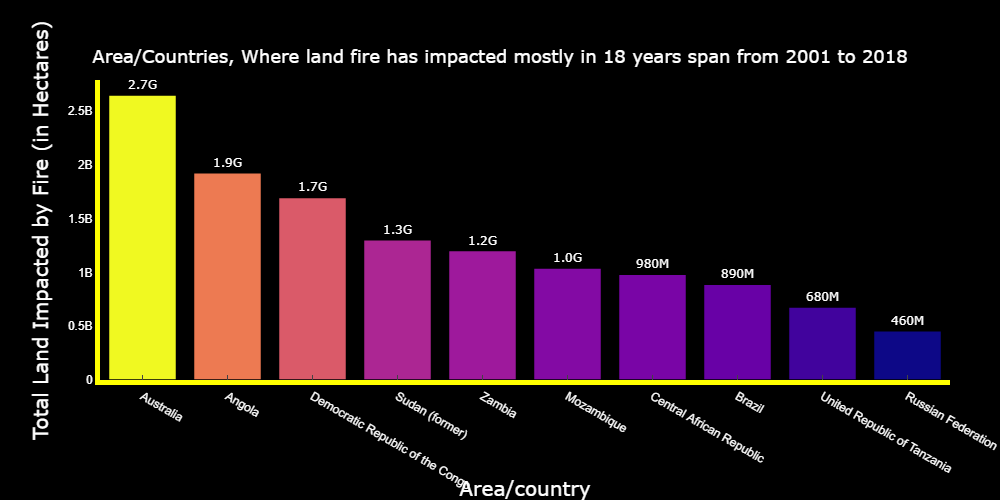

In [41]:
totalBurnedArea2001_18=landfiredfPivot[['Area','Area Code (ISO3)','Year','TotalBurnedArea']]
Country_Impacted_by_Fire=totalBurnedArea2001_18.groupby(['Area','Area Code (ISO3)'])[['TotalBurnedArea']].sum().reset_index().sort_values(['TotalBurnedArea'],ascending=False).head(10)

fig = go.Figure()
fig.add_trace(
    go.Bar(x=Country_Impacted_by_Fire['Area'].values,
            y=Country_Impacted_by_Fire['TotalBurnedArea'].values,
            marker_color=Country_Impacted_by_Fire['TotalBurnedArea'].values,
            marker_line_color='black',
            marker_line_width=1.5,
            opacity=1,
            
            )    
)
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside',textfont_color='white')    
fig.update_layout(title='Area/Countries, Where land fire has impacted mostly in 18 years span from 2001 to 2018',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Area/country',
                    yaxis_title='Total Land Impacted by Fire (in Hectares)',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=500,
                    width=1000
                    )
fig.update_layout( xaxis=dict(
                                showline=True,
                                showgrid=False,
                                showticklabels=True,
                                linecolor='yellow',
                                linewidth=5,
                                # gridcolor='gray',
                                # gridwidth=0.1,

                                ticks='inside',

                                tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                                titlefont=dict(
                                        size=20,
                                        color='white'
                                        )
                              ),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=False,
                        # gridcolor='gray',
                        # gridwidth=0.1,
                        zeroline=False,
                        # zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=False, 
                                    l=100,
                                    r=50,
                                    t=80,
                                    b=120
                                    ),
                        ) 
fig.show('png')